In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dsata Set for Assignment 1.csv')

# Feature Engineering Task 1:

In [3]:
#We first need to undersatand the number of missing values in each column
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#The NULL values are only present in continuous numerical values, so we fill it with the mean of exsisting values in the column
df_new=df
df_new['radius_mean'] = df_new['radius_mean'].replace(np.NaN, df_new['radius_mean'].mean())
df_new['perimeter_mean'] = df_new['perimeter_mean'].replace(np.NaN, df_new['perimeter_mean'].mean())
df_new['concavity_mean'] = df_new['concavity_mean'].replace(np.NaN, df_new['concavity_mean'].mean())
df_new['compactness_se'] = df_new['compactness_se'].replace(np.NaN, df_new['compactness_se'].mean())
df_new['area_worst'] = df_new['area_worst'].replace(np.NaN, df_new['area_worst'].mean())
df_new['concavity_worst'] = df_new['concavity_worst'].replace(np.NaN, df_new['concavity_worst'].mean())

In [5]:
# We have successfully added the missing values
df.isnull().sum().sum()

0

# Feature Engineering Task 2

In [6]:
# Normalizing all the features and saving it in a new DataFrame
normalized_df=df_new
normalized_df.iloc[:,2:]=df_new.iloc[:,2:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [7]:
# The Normalized DataSet is shown below
normalized_df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M     1.102422     -2.071512        1.268389   0.983510   
1      842517         M     1.836635     -0.353322        1.684639   1.907030   
2    84300903         M     1.586206      0.455786        1.565122   1.557513   
3    84348301         M    -0.767260      0.253509       -0.595257  -0.763792   
4    84358402         M     1.756953     -1.150804        1.775308   1.824624   
..        ...       ...          ...           ...             ...        ...   
564    926424         M     2.118368      0.720838        2.059677   2.341795   
565    926682         M     1.711420      2.083301        1.614577   1.722326   
566    926954         M     0.706858      2.043775        0.670803   0.577445   
567    927241         M     1.845172      2.334403        1.981372   1.733693   
568     92751         B    -1.808817      1.220718       -1.817631  -1.346604  

# Part A - Perceptron Learning Algorithm:

# Part B – Fisher’s Linear Discriminant Analysis:

## Learning Task 1:

In [8]:
target_name = "diagnosis"

y = df_new[target_name]

x = df_new.drop(['id', 'diagnosis'], axis=1)

In [9]:
x_train = x.sample(frac=0.66, random_state=25)
x_test = x.drop(x_train.index)

print(f"No. of training examples: {x_train.shape}")
print(f"No. of testing examples: {x_test.shape}")

No. of training examples: (376, 30)
No. of testing examples: (193, 30)


In [10]:
y_train = y.sample(frac=0.66, random_state=25)
y_test = y.drop(y_train.index)

print(f"No. of training examples: {y_train.shape}")
print(f"No. of testing examples: {y_test.shape}")

No. of training examples: (376,)
No. of testing examples: (193,)


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [12]:
x_train_lda.shape, x_test_lda.shape

((376, 1), (193, 1))

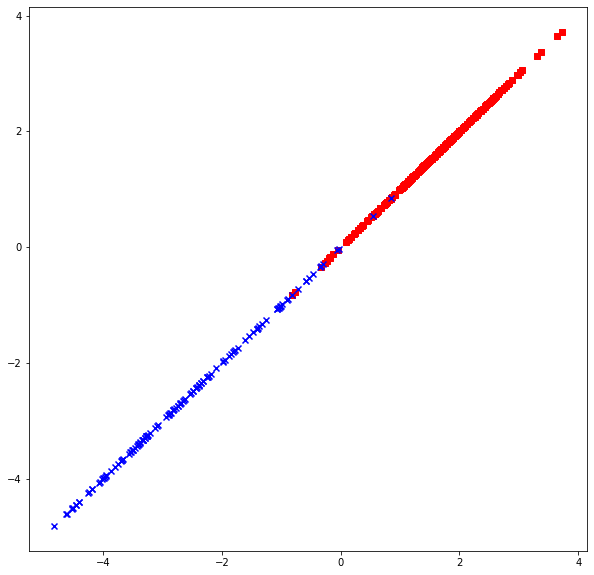

In [13]:
markers = ['s','x']
colors = ['r','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(x_train_lda[:,0][y_train==l],x_train_lda[:,0][y_train==l],c=c,marker=m)
    

## Learning Task 2:

In [14]:
#Change the order of features in the dataset randomly.

x=np.random.randint(30, size=(30))

x_train_FLDM2= x_train.iloc[:, x]
x_test_FLDM2= x_train.iloc[:, x]


In [15]:
x_train_FLDM2
#Viewing the changed dataset

,concavity_se,fractal_dimension_se,concavity_worst,fractal_dimension_worst,radius_se,concavity_se,concavity_mean,area_se,area_worst,symmetry_mean,...,symmetry_mean,concavity_mean,radius_worst,texture_mean,radius_mean,smoothness_worst,area_mean,symmetry_worst,concavity_worst,radius_mean
522,-0.929161,-0.566842,-1.185099,-0.432739,-0.976414,-0.929161,-1.052649,-0.681565,-0.782708,-0.636962,...,-0.636962,-1.052649,-0.897780,0.125633,-0.812792,-0.944647,-0.758109,-0.555632,-1.185099,-0.812792
120,-0.555015,-0.600477,-0.298548,0.071101,-0.953335,-0.555015,-0.675400,-0.655890,-0.651643,-0.527530,...,-0.527530,-0.675400,-0.713639,-1.969211,-0.770105,0.982436,-0.714916,0.186276,-0.298548,-0.770105
241,-0.841472,-0.920196,-1.007185,-0.892286,-1.045289,-0.841472,-0.984073,-0.688731,-0.593840,-0.968906,...,-0.968906,-0.984073,-0.635017,-0.988052,-0.482681,-1.255609,-0.506911,0.000395,-1.007185,-0.482681
362,-0.550046,-0.628065,-0.704730,-0.640366,-0.663049,-0.550046,-0.778835,-0.507289,-0.530065,-0.191939,...,-0.191939,-0.778835,-0.521222,-0.104544,-0.385924,-0.112498,-0.449795,-0.253373,-0.704730,-0.385924
221,-0.213798,-0.331398,-0.070760,-0.120469,-0.534675,-0.213798,-0.129605,-0.424415,-0.342251,0.548551,...,0.548551,-0.129605,-0.266734,-1.253105,-0.158261,0.229122,-0.265943,0.265478,-0.070760,-0.158261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,-0.174044,0.008351,1.222597,2.178927,-0.256649,-0.174044,0.583393,-0.116662,0.666919,0.679870,...,0.679870,0.583393,0.815356,-0.327746,0.573106,0.535703,0.432807,2.213189,1.222597,0.573106
266,0.054538,-0.180231,-0.387745,-0.447135,0.163454,0.054538,-0.314508,-0.290982,-0.802210,0.402642,...,0.402642,-0.314508,-0.908125,-0.078969,-1.000614,-0.484775,-0.876603,0.063433,-0.387745,-1.000614
85,-0.127003,-0.015080,0.207381,0.102107,1.062079,-0.127003,0.559543,0.885074,1.267783,1.168666,...,1.168666,0.559543,1.378125,-0.178945,1.236174,0.325476,1.193788,1.283783,0.207381,1.236174
518,-0.591124,-0.187411,-0.709046,0.275960,0.134967,-0.591124,-0.510582,-0.131171,-0.363158,-0.374325,...,-0.374325,-0.510582,-0.252251,-0.248696,-0.351775,0.579501,-0.459740,-0.515223,-0.709046,-0.351775


In [16]:
x_train_lda_FLDM2 = lda.fit_transform(x_train_FLDM2, y_train)
x_test_lda_FLDM2 = lda.transform(x_test_FLDM2)

In [17]:
x_train_lda_FLDM2.shape, x_test_lda_FLDM2.shape

((376, 1), (376, 1))

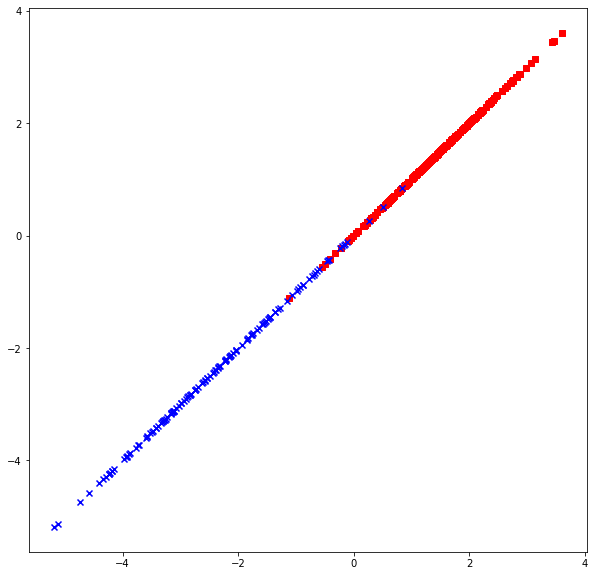

In [18]:
markers = ['s','x']
colors = ['r','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(x_train_lda_FLDM2[:,0][y_train==l],x_train_lda_FLDM2[:,0][y_train==l],c=c,marker=m)
    

# Part C – Logistic Regression: